In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.options.display.max_columns=None

<h2>Feature Selection</h2>

In [211]:
data=pd.read_csv('HousePriceFinal.csv')

In [212]:
TrainY=data['SalePrice']
TrainX=data.drop(['Id','SalePrice'],axis=1)
TrainX.shape

(1460, 79)

In [213]:
# I will understand Lasso later for now doing the feature selection

features=SelectFromModel(Lasso(alpha=0.005,random_state=101))
features.fit(TrainX,TrainY)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=101))

In [214]:
features.get_support().sum()

21

In [215]:
SelectedFeatures=TrainX.columns[features.get_support()]
SelectedFeatures

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [216]:
# for i in SelectedFeatures:
#     data.boxplot(column=i)
#     plt.title(f'Sale Price vs {i}',color='w')
#     plt.xticks(color='w')
#     plt.yticks(color='w')
#     plt.show()

In [217]:
# data["GrLivArea"].()

<h2>Model Training</h2>

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [219]:
XTrain,XTest,YTrain,YTest=train_test_split(TrainX[SelectedFeatures],TrainY,test_size=0.1,random_state=101)

In [220]:
LR=LinearRegression()

In [221]:
LR.fit(XTrain,YTrain)

LinearRegression()

In [222]:
YTest=YTest.to_numpy()
YTest=YTest.reshape(-1,1)

In [223]:
PredictedPrices=LR.predict(XTest)

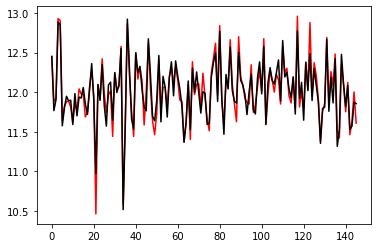

In [224]:
diff=PredictedPrices-YTest
plt.plot(YTest,color='r')
plt.plot(PredictedPrices,color='black')

plt.show()

In [225]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(YTest,PredictedPrices))
rmse

0.11570598471569593

In [226]:
from sklearn import metrics
r2=metrics.r2_score(YTest,PredictedPrices)
r2*100

91.07906604764199

In [227]:
PredictedPrices=PredictedPrices.reshape(-1,1)
LR.score(XTest,YTest)
# YTest.shape

0.9107906604764199